## Data visualisation with Matplotlib and Seaborn

Matplotlib is a popular and powerful graph plotting library, but needs relatively complex customisations usually to produce visually appealing plots. Seaborn is built on top of the Matplotlib engine that out-of-the-box produces production ready plots from data, optimised for Pandas DataFrames.

As a rule of thumb, when you need customisability use native Matplotlib, when you need beautiful and functional plots use Seaborn.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
data = pd.read_csv('../data/trafikkregistreringspunkt_1_-_uke_42_og_43_2020.csv')

### Histograms

Histograms are a type of bar plot for numeric data that group the data into bins. After you create a Histogram object, you can modify aspects of the histogram by changing its property values. This is particularly useful for quickly modifying the properties of the bins or changing the display.

**Pandas**

<AxesSubplot: xlabel='vehicle_type'>

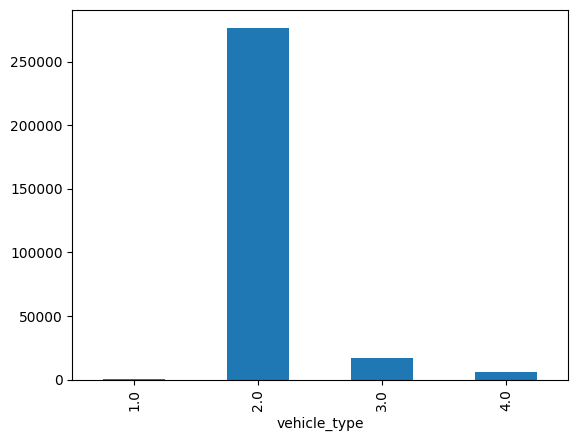

In [4]:
vehicle_type_count = data.groupby('vehicle_type')['event_number'].count()
vehicle_type_count.plot(kind='bar')

It looks almost like there are no vehicles of type 1, but we know that that's not true from using `count()` above. Let's transform our data to a logarithmic scale and plot again.

<AxesSubplot: xlabel='vehicle_type'>

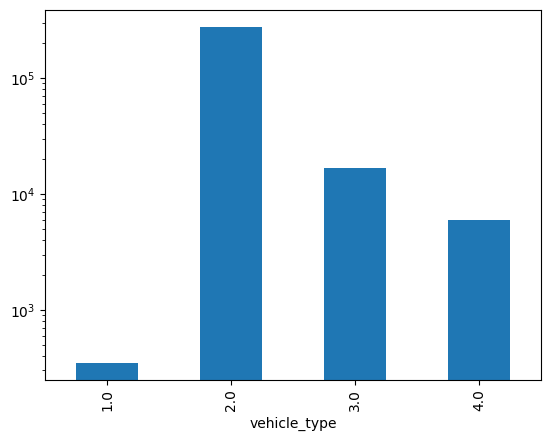

In [6]:
vehicle_type_count.plot(kind='bar', logy=True)

**Matplotlib native**

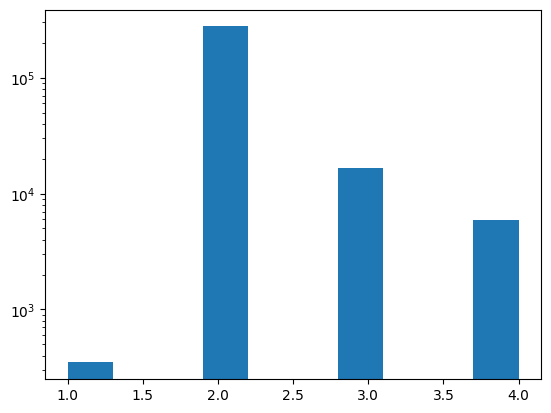

In [7]:
fig, ax1 = plt.subplots() # prepare a matplotlib figure
ax1.hist(data.vehicle_type)
ax1.set_yscale('log')

This doesn't look so great yet

Text(0, 0.5, 'Count')

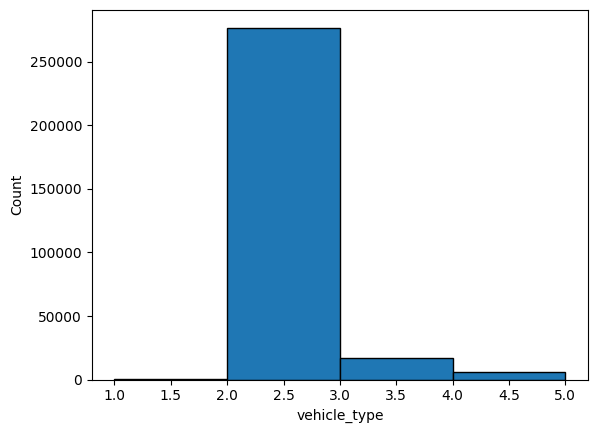

In [8]:
fig, ax1 = plt.subplots()
bins = range(1, data.vehicle_type.nunique()+2)
ax1.hist(data.vehicle_type, bins=bins, edgecolor='black', linewidth=1)
ax1.set_xlabel('vehicle_type')
ax1.set_ylabel('Count')

Text(0, 0.5, 'Count')

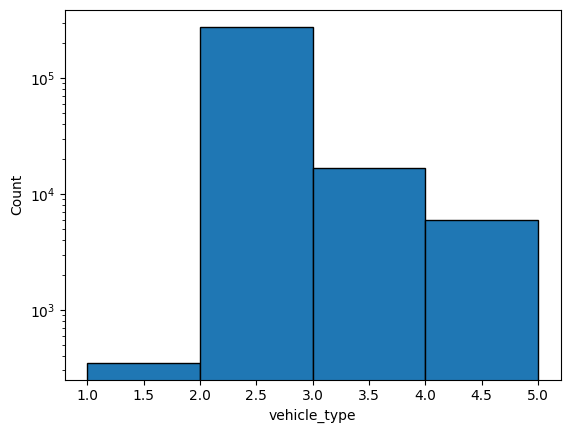

In [9]:
fig, ax1 = plt.subplots()
ax1.hist(data.vehicle_type, bins=bins, edgecolor='black', linewidth=1)
ax1.set_yscale('log')
ax1.set_xlabel('vehicle_type')
ax1.set_ylabel('Count')

**Seaborn**

<AxesSubplot: xlabel='vehicle_type', ylabel='Count'>

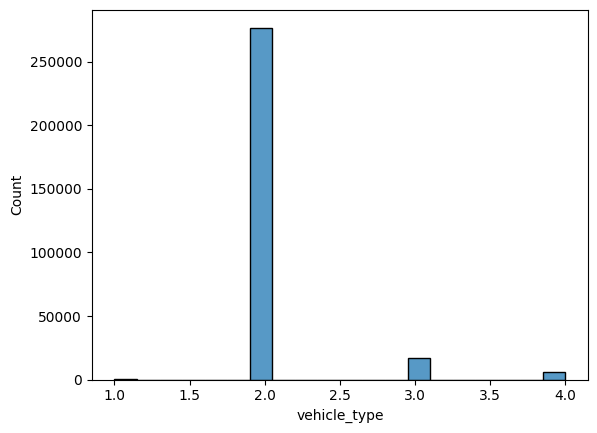

In [10]:
sns.histplot(data=data, x='vehicle_type')

<AxesSubplot: xlabel='vehicle_type', ylabel='Count'>

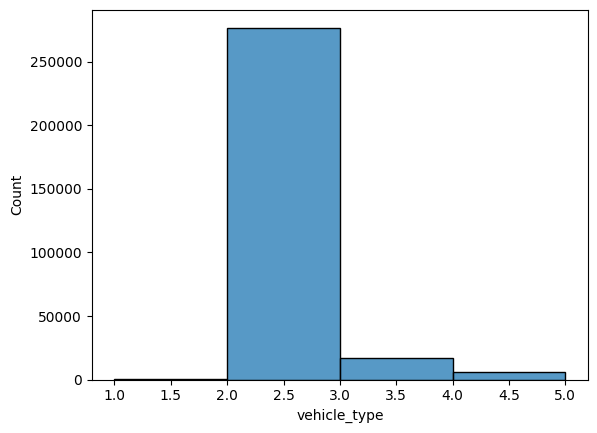

In [11]:
sns.histplot(data=data, x='vehicle_type', bins=bins)

<AxesSubplot: xlabel='vehicle_type', ylabel='Count'>

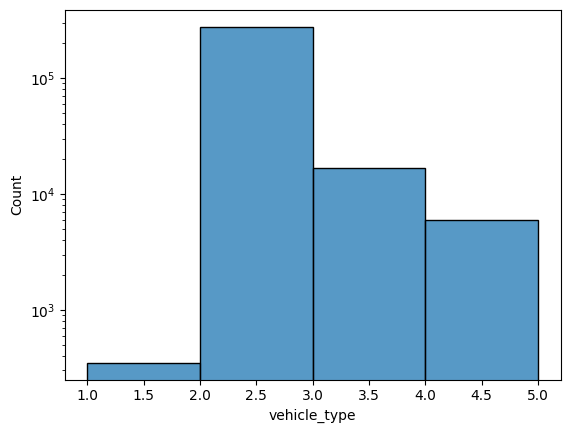

In [12]:
sns.histplot(data=data, x='vehicle_type', bins=bins, log_scale=[False, True])

Let's look at the validity of entries per vehicle type. To do that we create a stacked bar plot, with validity (True or False) as the stacked variable. First we need a new variable for the total validity of an entry

In [13]:
data['valid'] = data['valid_classification'] & data['valid_event'] &\
                data['valid_length'] & ['valid_speed']
data['valid'] = data['valid'].astype(int)

In [14]:
vehicle_type_valid = data.groupby(['vehicle_type', 'valid'])['event_number'].count()
vehicle_type_valid

vehicle_type  valid
1.0           0           338
              1            11
2.0           0         78919
              1        197852
3.0           0          3732
              1         12951
4.0           0           984
              1          4956
Name: event_number, dtype: int64

In [15]:
vehicle_type_valid_df = vehicle_type_valid.unstack()

**Pandas**

<AxesSubplot: xlabel='vehicle_type'>

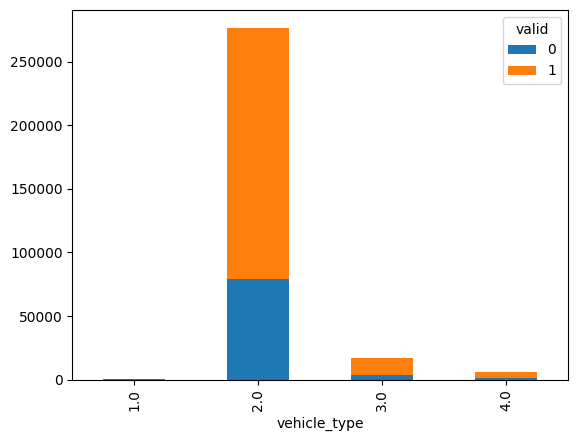

In [16]:
vehicle_type_valid_df.plot(kind='bar', stacked=True)

**Matplotlib native**

See upcoming section on grouped bar plots

**Seaborn**

<AxesSubplot: xlabel='vehicle_type', ylabel='Count'>

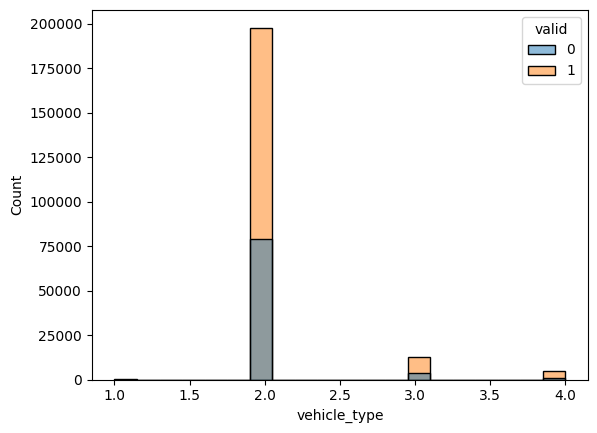

In [17]:
sns.histplot(data=data, x='vehicle_type', hue='valid')

### Bar plots

A bar plot represents an estimate of central tendency for a numeric variable with the height of each rectangle and provides some indication of the uncertainty around that estimate using error bars. Bar plots include 0 in the quantitative axis range, and they are a good choice when 0 is a meaningful value for the quantitative variable, and you want to make comparisons against it.

**Pandas**

In [18]:
speedbylane = data.groupby('lane').speed.mean()

In [19]:
speedbylane_std = data.groupby('lane').speed.std()

<AxesSubplot: xlabel='lane'>

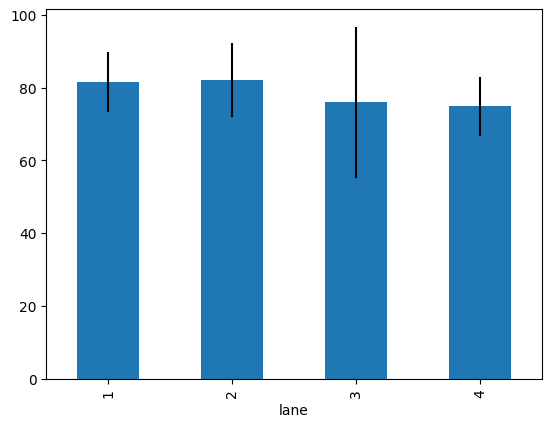

In [20]:
speedbylane.plot(kind='bar', yerr=speedbylane_std)

**Matplotlib native**

<BarContainer object of 4 artists>

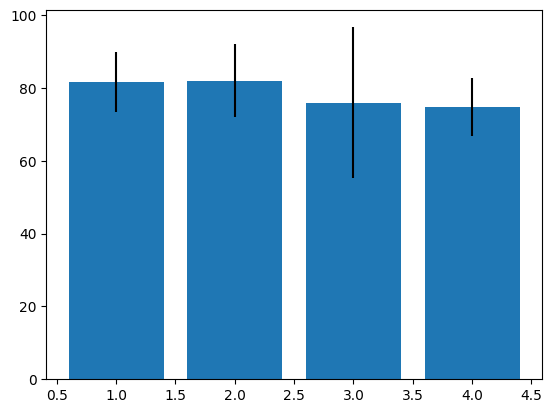

In [21]:
fig, ax1 = plt.subplots() # prepare a matplotlib figure
ax1.bar(speedbylane.index, speedbylane, yerr=speedbylane_std)

**Seaborn**

<AxesSubplot: xlabel='lane', ylabel='speed'>

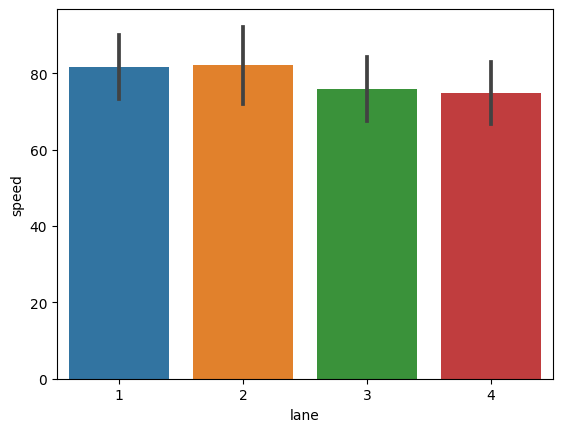

In [33]:
sns.barplot(data=data, x='lane', y='speed', errorbar='sd')

### Scatterplot

A scatterplot is a type of data display that shows the relationship between two numerical variables. Each member of the dataset gets plotted as a point whose x-y coordinates relates to its values for the two variables.

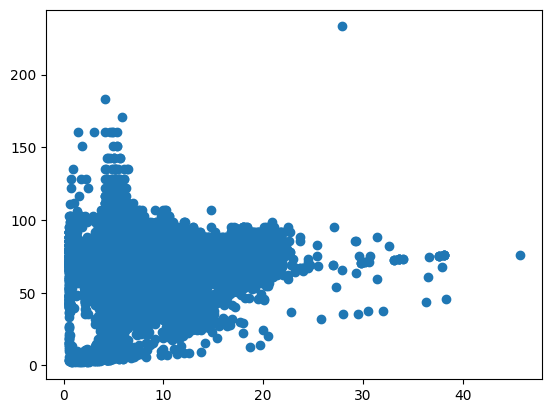

In [34]:
fig, ax1 = plt.subplots() # prepare a matplotlib figure
ax1.scatter(data.length, data.speed)

Clearly there's a nonsensical outlier in the data

In [35]:
data.length.max()

45.7

In [36]:
data.length.idxmax()

178946

In [37]:
data.speed.max()

233.1

In [38]:
data.speed.idxmax()

158156

In [39]:
data = data.drop(data.speed.idxmax())

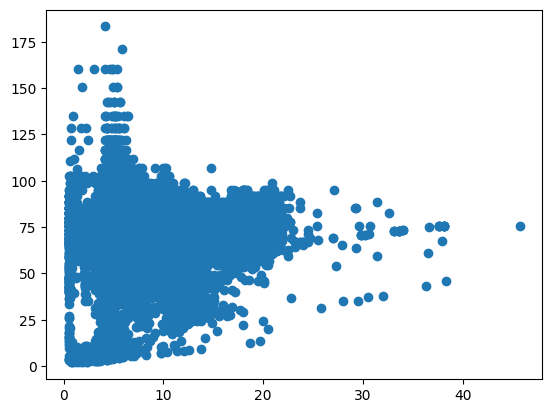

In [40]:
fig, ax1 = plt.subplots() # prepare a matplotlib figure
ax1.scatter(data.length, data.speed)

Text(0, 0.5, 'speed')

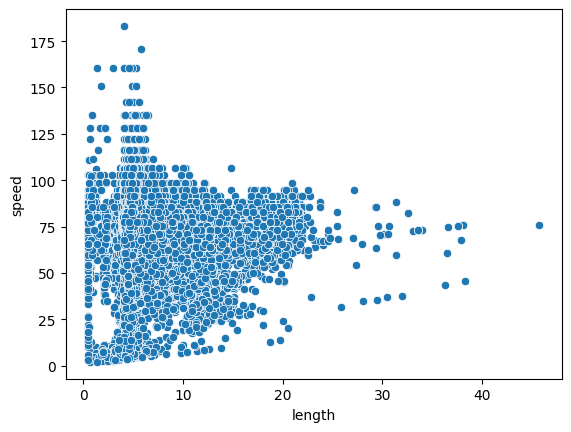

In [41]:
fig, ax1 = plt.subplots() # prepare a matplotlib figure
ax1.scatter(data.length, data.speed, edgecolor='white', linewidth=0.5)
ax1.set_xlabel('length')
ax1.set_ylabel('speed')

<AxesSubplot: xlabel='length', ylabel='speed'>

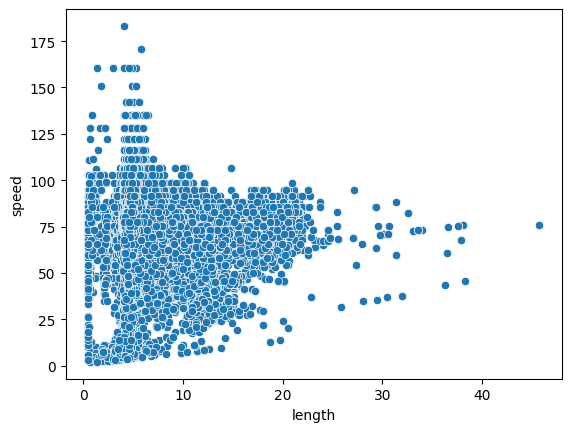

In [42]:
sns.scatterplot(data=data, x='length', y='speed')

In [43]:
vehicle_types = data.vehicle_type.unique()
colours = get_n_colours(5)
cmap = {vehicle_types[i]: colours[i] for i in range(5)}
cmap

NameError: name 'get_n_colours' is not defined

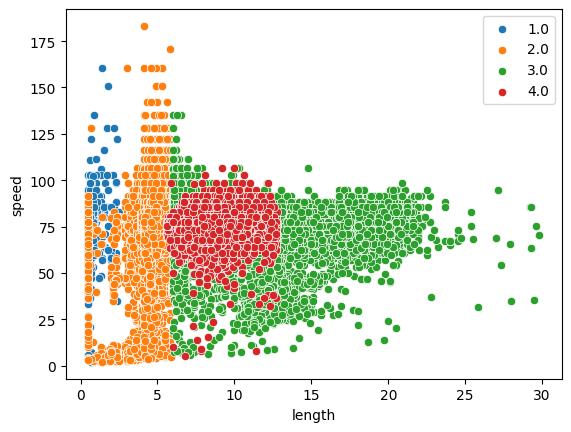

In [44]:
data_grouped = data.groupby('vehicle_type')

fig, ax1 = plt.subplots() # prepare a matplotlib figure

for key, group in data_grouped:
    ax1.scatter(group.length, group.speed, edgecolor='white', linewidth=0.5, label=key)

ax1.set_xlabel('length')
ax1.set_ylabel('speed')
ax1.legend(loc='upper right')

<AxesSubplot: xlabel='length', ylabel='speed'>

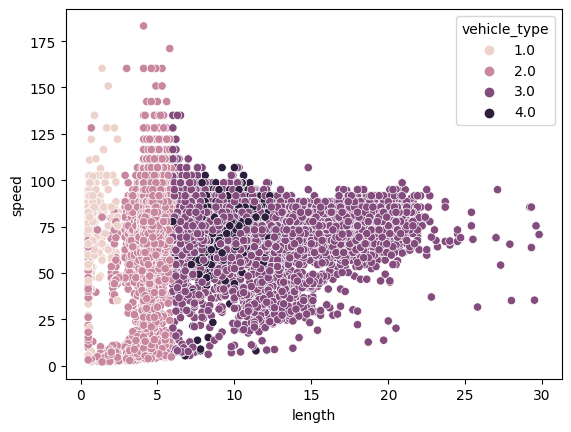

In [45]:
sns.scatterplot(data=data, x='length', y='speed', hue='vehicle_type')

### Grouped bar plots

A grouped bar chart (aka clustered bar chart, multi-series bar chart) extends the bar chart, plotting numeric values for levels of two categorical variables instead of one. Bars are grouped by position for levels of one categorical variable, with color indicating the secondary category level within each group.

In [46]:
data['valid'] = data['valid_classification'] & data['valid_event'] &\
                data['valid_length'] & ['valid_speed']

In [47]:
x = np.arange(4)
x

array([0, 1, 2, 3])

In [48]:
data.sem()['length']

/tmp/ipykernel_2378/2538438769.py:1: FutureWarning: The default value of numeric_only in DataFrame.sem is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.sem()['length']


0.0033192559693296392

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


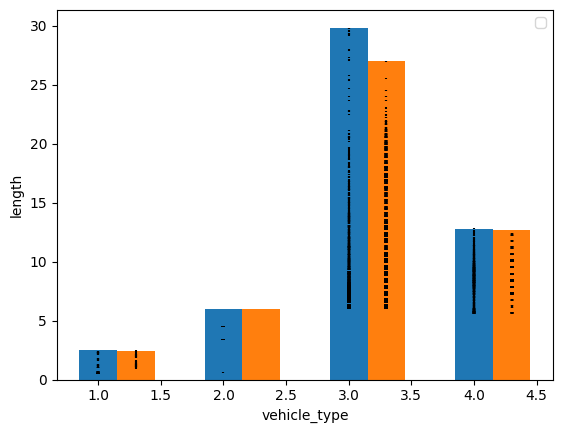

In [49]:
import numpy as np

grouped_data = data.groupby('valid')
x = np.arange(5)
width = 0.3

fig, ax1 = plt.subplots() # prepare a matplotlib figure

for key, group in data_grouped:
    error_false = group[group['valid'] == False]['length'].sem()
    length_false = group['length'][group['valid'] == False]
    error_true = group[group['valid'] == True]['length'].sem()
    length_true = group['length'][group['valid'] == True]
    ax1.bar(key, length_false, width=width, color='tab:blue', yerr=error_false)
    ax1.bar(key+width, length_true, width=width, color='tab:orange', yerr=error_true)
    
ax1.set_xlabel('vehicle_type')
ax1.set_ylabel('length')
ax1.legend(loc='upper right')

In [50]:
error_false

0.05003695131854897

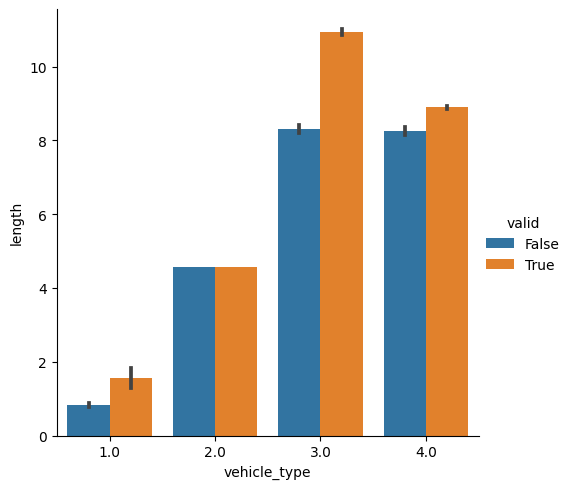

In [51]:
sns.catplot(data=data, kind='bar', x='vehicle_type', y='length', hue='valid')

### Boxplots

a box plot or boxplot is a method for graphically demonstrating the locality, spread and skewness groups of numerical data through their quartiles. In addition to the box on a box plot, there can be lines (which are called whiskers) extending from the box indicating variability outside the upper and lower quartiles, thus, the plot is also termed as the box-and-whisker plot and the box-and-whisker diagram. Outliers that differ significantly from the rest of the dataset may be plotted as individual points beyond the whiskers on the box-plot.

Text(0, 0.5, 'length')

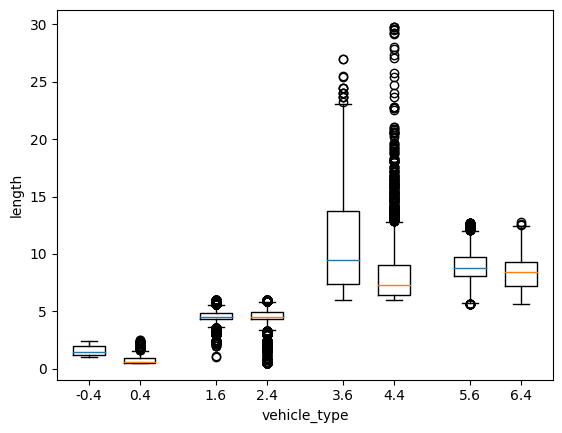

In [52]:
data_grouped = data.groupby('vehicle_type')

fig, ax1 = plt.subplots() # prepare a matplotlib figure

group_true = []
group_false = []
for key, group in data_grouped:
    group_true.append(group['length'][group['valid'] == True])
    group_false.append(group['length'][group['valid'] == False])
    
bpt = ax1.boxplot(group_true, positions=np.array(range(len(group_true)))*2.0-0.4)
bpf = ax1.boxplot(group_false, positions=np.array(range(len(group_false)))*2.0+0.4)

plt.setp(bpt['medians'], color='tab:blue')    
ax1.set_xlabel('vehicle_type')
ax1.set_ylabel('length')
#ax1.legend(loc='upper right')

<AxesSubplot: xlabel='vehicle_type', ylabel='length'>

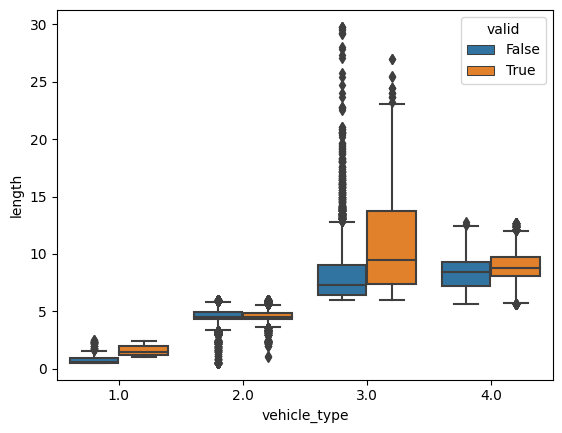

In [53]:
sns.boxplot(data=data, x='vehicle_type', y='length', hue='valid')

### Distribution plot

A distribution plot, depicts the variation in the data distribution.

In [54]:
data.columns

Index(['created_at_timestamp', 'event_emitted_timestamp', 'event_number',
       'event_timestamp', 'klokketime', 'lane', 'length', 'qspeed',
       'region_id', 'speed', 'time_gap', 'traffic_registration_point_id',
       'valid_classification', 'valid_event', 'valid_length', 'valid_speed',
       'vehicle_type', 'vehicle_type_raw', 'weight',
       'with_traffic_registration_point_direction', 'wrong_direction',
       'valid'],
      dtype='object')

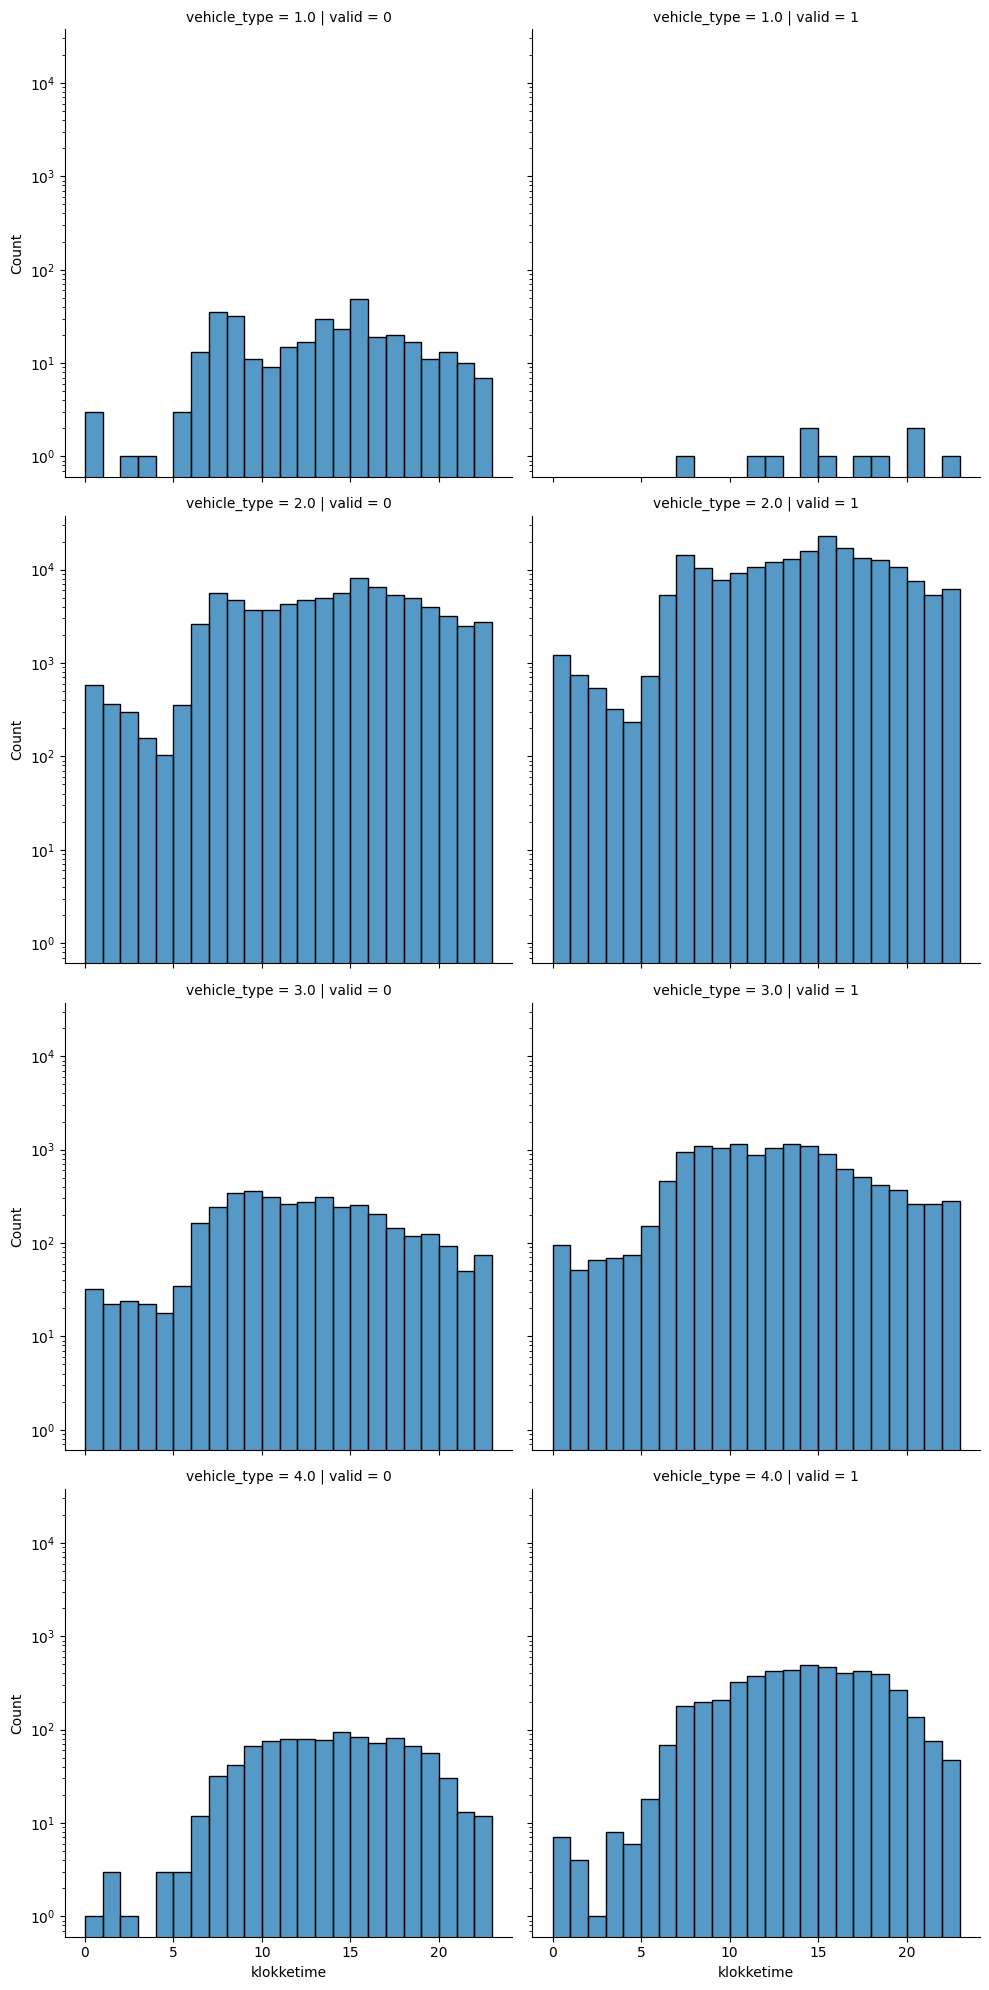

In [55]:
sub = data[['klokketime', 'vehicle_type', 'valid']].copy()
sub['valid'] = sub['valid'].astype(int)
sns.displot(sub, x='klokketime', col='valid', row='vehicle_type', log_scale=[False, True], binwidth=1)

### Correlation heatmap

Used to visualise correlation between any variable with another (only numerical variables). Handy indicator for building predictive models.

/tmp/ipykernel_2378/449910176.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()


<AxesSubplot: >

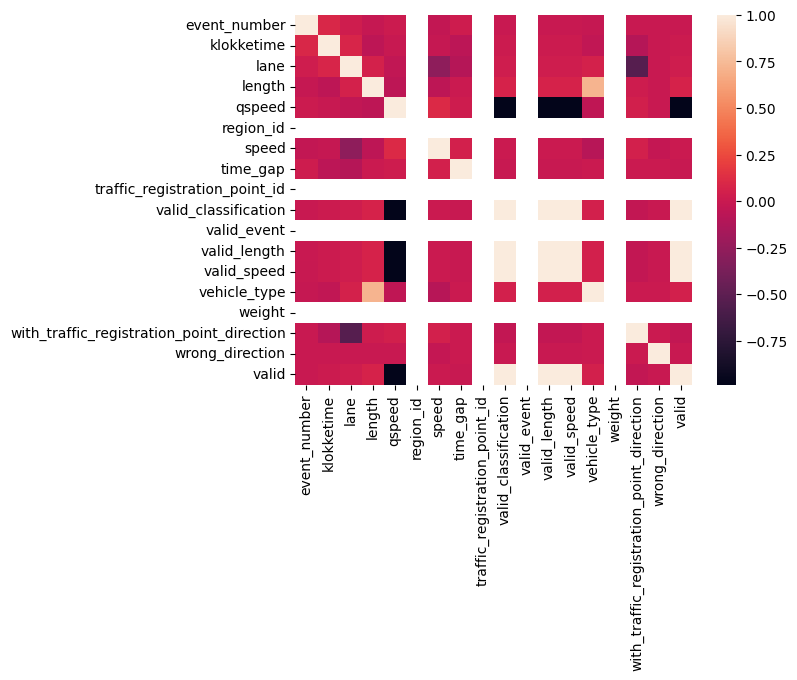

In [56]:
corr = data.corr()
sns.heatmap(corr)